# CS 155 Miniproject 2

## Karthik Karnik, Anvita Mishra, Kapil Sinha

# ANNOUNCEMENT:

The plots use adjustText which is sourced here: https://github.com/Phlya/adjustText

You can install this by doing:

pip install adjustText

You need this because using just plt.annotate produces overlapping labels



## Basic Visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

from adjustText import adjust_text
import itertools

from prob2utils_skeleton import train_model as normal_train_model, get_err as normal_get_err
from prob2utils_global_bias_skeleton import train_model as global_bias_train_model, get_err as global_bias_get_err

In [3]:
# encoding must be latin-1 to handle the format of this data
data = np.loadtxt('data/data.txt', delimiter='\t', encoding='latin-1')
# dtype must be None for the function to infer type based on the column
movies = np.genfromtxt('data/movies.txt', delimiter='\t', encoding='latin-1', dtype=None)

In [4]:
train = np.loadtxt('data/train.txt', delimiter='\t', encoding='latin-1')
test = np.loadtxt('data/test.txt', delimiter='\t', encoding='latin-1')

In [5]:
data_df = pd.DataFrame(data)
data_df.columns = ["User ID", "Movie ID", "Rating"]
movies_df = pd.DataFrame(movies)
movies_df.columns = ["Movie ID", "Movie Title", "Unknown", "Action", "Adventure", "Animation", \
                     "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", \
                     "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
train_df = pd.DataFrame(train)
train_df.columns = ["User ID", "Movie ID", "Rating"]
test_df = pd.DataFrame(test)
test_df.columns = ["User ID", "Movie ID", "Rating"]

In [6]:
data_df.head()

,User ID,Movie ID,Rating
0,196.0,242.0,3.0
1,186.0,302.0,3.0
2,22.0,377.0,1.0
3,244.0,51.0,2.0
4,166.0,346.0,1.0


In [7]:
movies_df.head()

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Text(0,0.5,'Count')

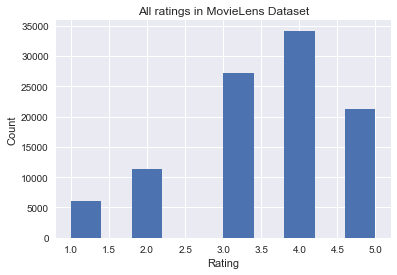

In [8]:
#sns.distplot(data[:,2]) # Equivalent to sns.distplot(data_df["Rating"])
plt.hist(data_df["Rating"])
plt.title("All ratings in MovieLens Dataset")
plt.xlabel("Rating")
plt.ylabel("Count")

In [9]:
import collections

# Returns dictionary whose keys are array elements and values are their corresponding frequencies
def CountFrequency(arr):
    return dict(collections.Counter(arr))

def kLargest(arr, k):
    arr.sort(reverse=True)
    return arr[0:k]

freq = CountFrequency(data_df["Movie ID"])
ten_largest = kLargest(list(freq.values()), 10)
inv_map = {v: k for k, v in freq.items()}
popular_movies = [inv_map[x] for x in ten_largest]
# popular_movies: [50.0, 258.0, 100.0, 181.0, 294.0, 286.0, 288.0, 1.0, 300.0, 121.0]
most_popular_ratings = data_df[np.isin(data_df["Movie ID"], popular_movies)]

Text(0,0.5,'Count')

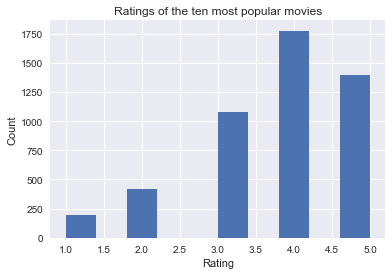

In [10]:
plt.hist(most_popular_ratings["Rating"])
plt.title("Ratings of the ten most popular movies")
plt.xlabel("Rating")
plt.ylabel("Count")

Text(0,0.5,'Count')

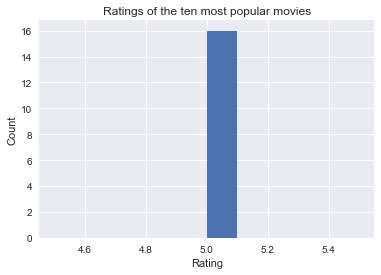

In [11]:
avg_ratings_df = data_df.groupby('Movie ID', as_index=False)['Rating'].mean()
best_ratings = kLargest(list(avg_ratings_df["Rating"]), 10)
best_movie_ids = avg_ratings_df[np.isin(avg_ratings_df["Rating"], best_ratings)]["Movie ID"]
best_movies = data_df[np.isin(data_df["Movie ID"], best_movie_ids)]
plt.hist(best_movies["Rating"])
plt.title("Ratings of the ten most popular movies")
plt.xlabel("Rating")
plt.ylabel("Count")

Text(0,0.5,'Count')

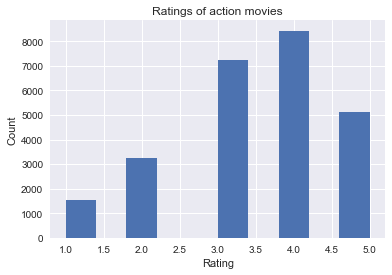

In [12]:
action_movie_ids = list(movies_df[movies_df["Action"] == 1]["Movie ID"])
action_movies = data_df[np.isin(data_df["Movie ID"], action_movie_ids)]
plt.hist(action_movies["Rating"])
plt.title("Ratings of action movies")
plt.xlabel("Rating")
plt.ylabel("Count")

Text(0,0.5,'Count')

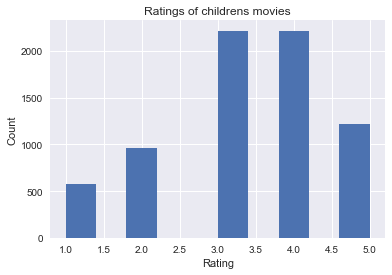

In [13]:
childrens_movie_ids = list(movies_df[movies_df["Childrens"] == 1]["Movie ID"])
childrens_movies = data_df[np.isin(data_df["Movie ID"], childrens_movie_ids)]
plt.hist(childrens_movies["Rating"])
plt.title("Ratings of childrens movies")
plt.xlabel("Rating")
plt.ylabel("Count")

Text(0,0.5,'Count')

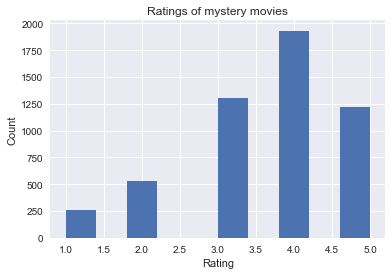

In [14]:
mystery_movie_ids = list(movies_df[movies_df["Mystery"] == 1]["Movie ID"])
mystery_movies = data_df[np.isin(data_df["Movie ID"], mystery_movie_ids)]
plt.hist(mystery_movies["Rating"])
plt.title("Ratings of mystery movies")
plt.xlabel("Rating")
plt.ylabel("Count")

In [15]:
random_movies = movies_df[:10][["Movie ID", "Movie Title"]]
random_movies

,Movie ID,Movie Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [16]:
popular_movie_ids = most_popular_ratings['Movie ID'].unique()
print ("Popular movies:")
popular_movies = movies_df[np.isin(movies_df["Movie ID"], popular_movie_ids)][['Movie ID', 'Movie Title']]
popular_movies

Popular movies:


,Movie ID,Movie Title
0,1,Toy Story (1995)
49,50,Star Wars (1977)
99,100,Fargo (1996)
120,121,Independence Day (ID4) (1996)
180,181,Return of the Jedi (1983)
257,258,Contact (1997)
285,286,"""English Patient, The (1996)"""
287,288,Scream (1996)
293,294,Liar Liar (1997)
299,300,Air Force One (1997)


In [17]:
best_movie_ids = best_movies['Movie ID'].unique()
print ("Best movies:")
best_movies = movies_df[np.isin(movies_df["Movie ID"], best_movie_ids)][['Movie ID', 'Movie Title']]
best_movies

Best movies:


,Movie ID,Movie Title
813,814,"""Great Day in Harlem, A (1994)"""
1121,1122,They Made Me a Criminal (1939)
1188,1189,Prefontaine (1997)
1200,1201,Marlene Dietrich: Shadow and Light (1996)
1292,1293,Star Kid (1997)
1466,1467,"""Saint of Fort Washington, The (1993)"""
1499,1500,Santa with Muscles (1996)
1535,1536,Aiqing wansui (1994)
1598,1599,Someone Else's America (1995)
1652,1653,Entertaining Angels: The Dorothy Day Story (1996)


In [18]:
action_movies = movies_df[np.isin(movies_df["Movie ID"], action_movie_ids)][['Movie ID', 'Movie Title']][:10]
action_movies

,Movie ID,Movie Title
1,2,GoldenEye (1995)
3,4,Get Shorty (1995)
16,17,From Dusk Till Dawn (1996)
20,21,Muppet Treasure Island (1996)
21,22,Braveheart (1995)
23,24,Rumble in the Bronx (1995)
26,27,Bad Boys (1995)
27,28,Apollo 13 (1995)
28,29,Batman Forever (1995)
32,33,Desperado (1995)


In [19]:
childrens_movies = movies_df[np.isin(movies_df["Movie ID"], childrens_movie_ids)][['Movie ID', 'Movie Title']][:10]
childrens_movies

,Movie ID,Movie Title
0,1,Toy Story (1995)
7,8,Babe (1995)
34,35,Free Willy 2: The Adventure Home (1995)
62,63,"""Santa Clause, The (1994)"""
70,71,"""Lion King, The (1994)"""
77,78,Free Willy (1993)
90,91,"""Nightmare Before Christmas, The (1993)"""
93,94,Home Alone (1990)
94,95,Aladdin (1992)
98,99,Snow White and the Seven Dwarfs (1937)


In [20]:
mystery_movies = movies_df[np.isin(movies_df["Movie ID"], mystery_movie_ids)][['Movie ID', 'Movie Title']][:10]
mystery_movies

,Movie ID,Movie Title
123,124,Lone Star (1996)
134,135,2001: A Space Odyssey (1968)
158,159,Basic Instinct (1992)
190,191,Amadeus (1984)
259,260,Event Horizon (1997)
290,291,Absolute Power (1997)
301,302,L.A. Confidential (1997)
306,307,"""Devil's Advocate, The (1997)"""
311,312,Midnight in the Garden of Good and Evil (1997)
321,322,Murder at 1600 (1997)


## Matrix Factorization Visualizations

In [21]:
# Avoid stupid indexing issues because Y values naturally would have been floats
Y_train = np.array(train, dtype=int)
Y_test = np.array(test, dtype=int)

In [22]:
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies

In [23]:
# For some reason, dtype=float is required
sparse_Y_train = csc_matrix((Y_train[:, 2], (Y_train[:, 0] - 1, Y_train[:, 1] - 1)), shape=(M, N), dtype=float)
sparse_Y_test = csc_matrix((Y_test[:, 2], (Y_test[:, 0] - 1, Y_test[:, 1] - 1)), shape=(M, N), dtype=float)

## Our Homework Code

In [24]:
def normal_model(Y_train, Y_test):
    M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
    N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
    print("Factorizing with ", M, " users, ", N, " movies.")

    reg = 0.1 # arbitrary regularization constant
    eta = 0.03 # learning rate

    K = 20
    U,V, err = normal_train_model(M, N, K, eta, reg, Y_train)
    return U, V

In [25]:
Ut_normal, V_normal= normal_model(Y_train, Y_test)

Factorizing with  943  users,  1682  movies.


In [26]:
# you can pass in a reg constant for get_err, but we forgo this for consistency
print ('Error: ' + str(normal_get_err(Ut_normal, V_normal, Y_test)))

Error: 0.44555668305577556


## Our Homework Code with global bias terms

In [27]:
def global_bias_model(Y_train, Y_test):
    M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
    N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
    print("Factorizing with ", M, " users, ", N, " movies.")

    reg = 0.1 # arbitrary regularization constant
    eta = 0.03 # learning rate

    K = 20
    U, V, a, b, err = global_bias_train_model(M, N, K, eta, reg, Y_train)
    return U, V, a, b

In [28]:
Ut_global_bias, V_global_bias, a_bias, b_bias = global_bias_model(Y_train, Y_test)

Factorizing with  943  users,  1682  movies.


In [29]:
print ('Error: ' + str(global_bias_get_err(Ut_global_bias, V_global_bias, Y_test, a_bias, b_bias)))

Error: 0.4834315747697823


# Off the shelf SVD implementation

## SVD with scipy.sparse.linalg.svds

In [38]:
Ut_svds, S, V_svds = svds(sparse_Y_train, k = 20)

In [39]:
print ('Error: ' + str(normal_get_err(Ut_svds, V_svds.transpose(), Y_test)))
print ('Error: ' + str(normal_get_err(Ut_svds, np.matmul(np.diag(S), V_svds).transpose(), Y_test)))

Error: 6.8565008493622805
Error: 3.131012715645944


In [40]:
A, S2, B = svds(V_svds, k = 2)

In [41]:
V_tilde = np.matmul(A.transpose(), V_svds)

In [42]:
V_tilde.transpose()

array([[ 0.05557791, -0.12172723],
       [-0.05843889,  0.0132067 ],
       [ 0.00400058, -0.00048221],
       ...,
       [ 0.00042825,  0.0006281 ],
       [ 0.00058104,  0.00069936],
       [ 0.00132971,  0.00187381]])

## Surprise!

In [30]:
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

read = Reader(line_format=u'user item rating', sep='\t')
model = SVD(n_factors=20)
train_data = Dataset.load_from_file('data/data.txt', read)

test_data = Dataset.load_from_file('data/test.txt', read)

model.fit(train_data.build_full_trainset())

predict = model.test(test_data.build_full_trainset().build_testset())

err = accuracy.rmse(predict) ** 2

V_surprise = model.qi
U_surprise = model.pu

RMSE: 0.8363


In [31]:
print ('Error: ' + str(normal_get_err(U_surprise, V_surprise, Y_test)))

Error: 6.87406654002655


In [32]:
childrens_movies

,Movie ID,Movie Title
0,1,Toy Story (1995)
7,8,Babe (1995)
34,35,Free Willy 2: The Adventure Home (1995)
62,63,"""Santa Clause, The (1994)"""
70,71,"""Lion King, The (1994)"""
77,78,Free Willy (1993)
90,91,"""Nightmare Before Christmas, The (1993)"""
93,94,Home Alone (1990)
94,95,Aladdin (1992)
98,99,Snow White and the Seven Dwarfs (1937)


In [64]:
def produce_visualizations(V, type_of_svd):
    if V.shape !=(20, 1682):
        V = V.transpose()
    a, s, b = np.linalg.svd(V)
    V_tilde = np.dot(a[:2], V)
    assert V_tilde.shape ==(2, 1682)
    
    V_tilde[0] = (V_tilde[0] - np.mean(V_tilde[0])) / np.std(V_tilde[0])
    V_tilde[1] = (V_tilde[1] - np.mean(V_tilde[1])) / np.std(V_tilde[1])

    print("This is using {} SVD".format(type_of_svd))
    movies_list = [random_movies, popular_movies, best_movies, action_movies, \
               childrens_movies, mystery_movies]

    movies_types = ['Random', 'Popular', 'Best', 'Action', 'Childrens', 'Mystery']
    
    fig = plt.figure(facecolor="w",figsize=(15,15))
    list_indices = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2,1)]

    for j in range(len(movies_list)):
        ax=fig.add_subplot(3,2,j+1)
        df_movie = movies_list[j]
        movie_type = movies_types[j]
        texts = []
        xy=[]
        index = list_indices[j]
        for k, row in df_movie.iterrows():
            _, name = row
            x = V_tilde[0][k]
            y = V_tilde[1][k]
            ax.plot(x,y, 'o')
            xy.append(x)
            xy.append(y)
            texts.append(plt.text(x, y, name))
        ax.set_title("Ten {} Movies".format(movie_type), size=16)
        adjust_text(texts, ax=ax, autoalign='xy', expand_points=(np.min(xy),np.max(xy)), force_text=0.05, \
                    arrowprops=dict(arrowstyle="->", color='b', lw=0.5))
        
    fig.suptitle('SVD type: {}'.format(type_of_svd), size=18, fontweight='bold')
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)

This is using Normal SVD


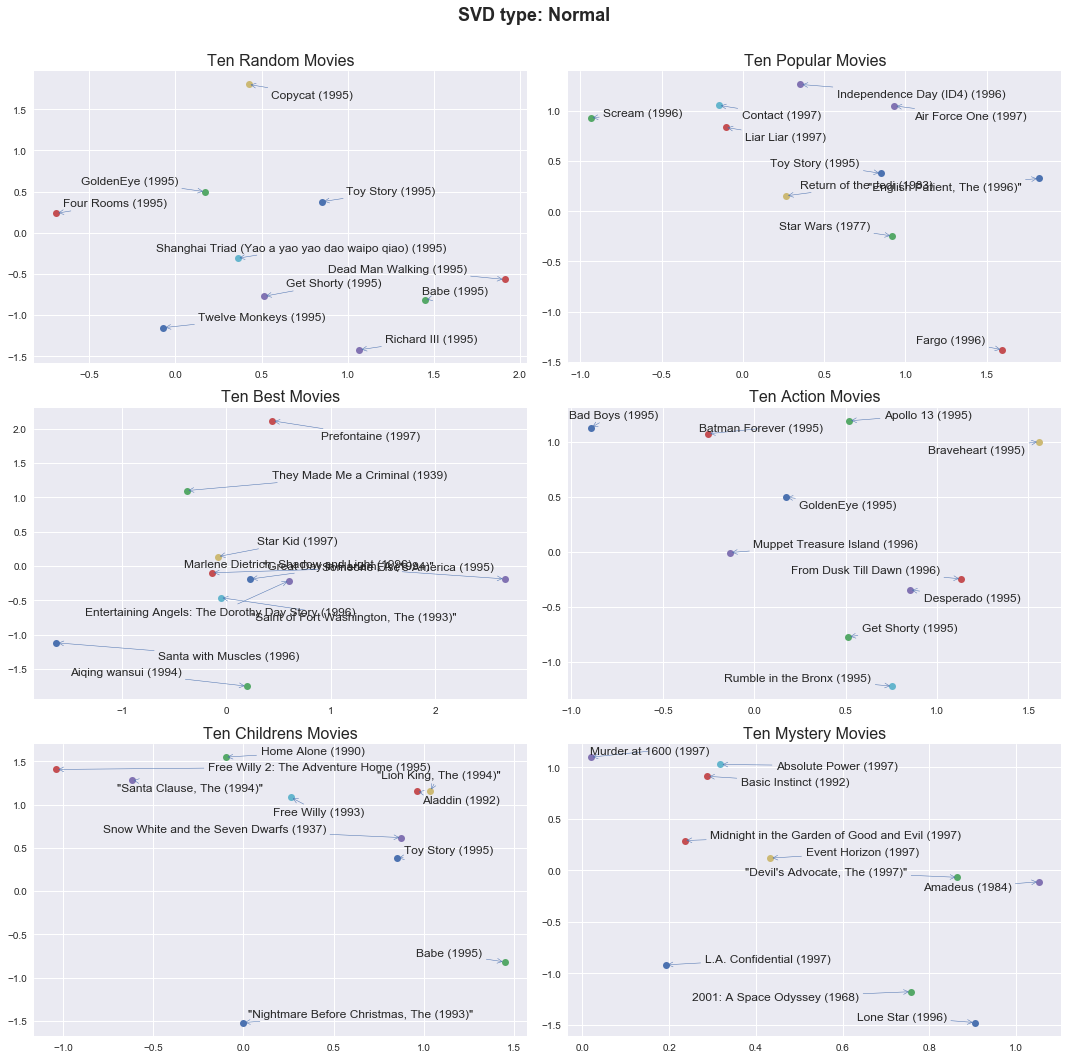

In [65]:
produce_visualizations(V_normal, 'Normal')

This is using Global Bias SVD


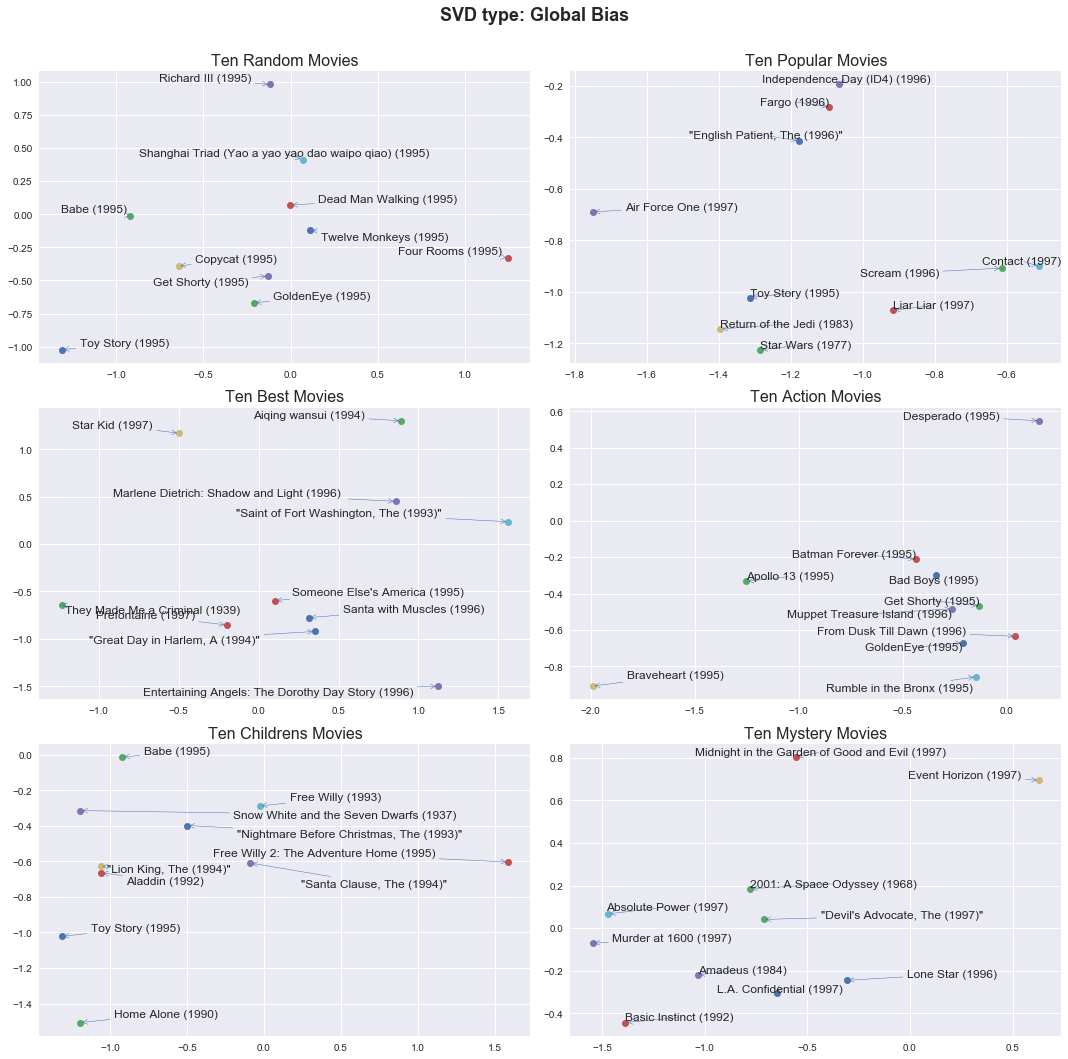

In [66]:
produce_visualizations(V_global_bias , 'Global Bias')

This is using Linear Scipy SVD SVD


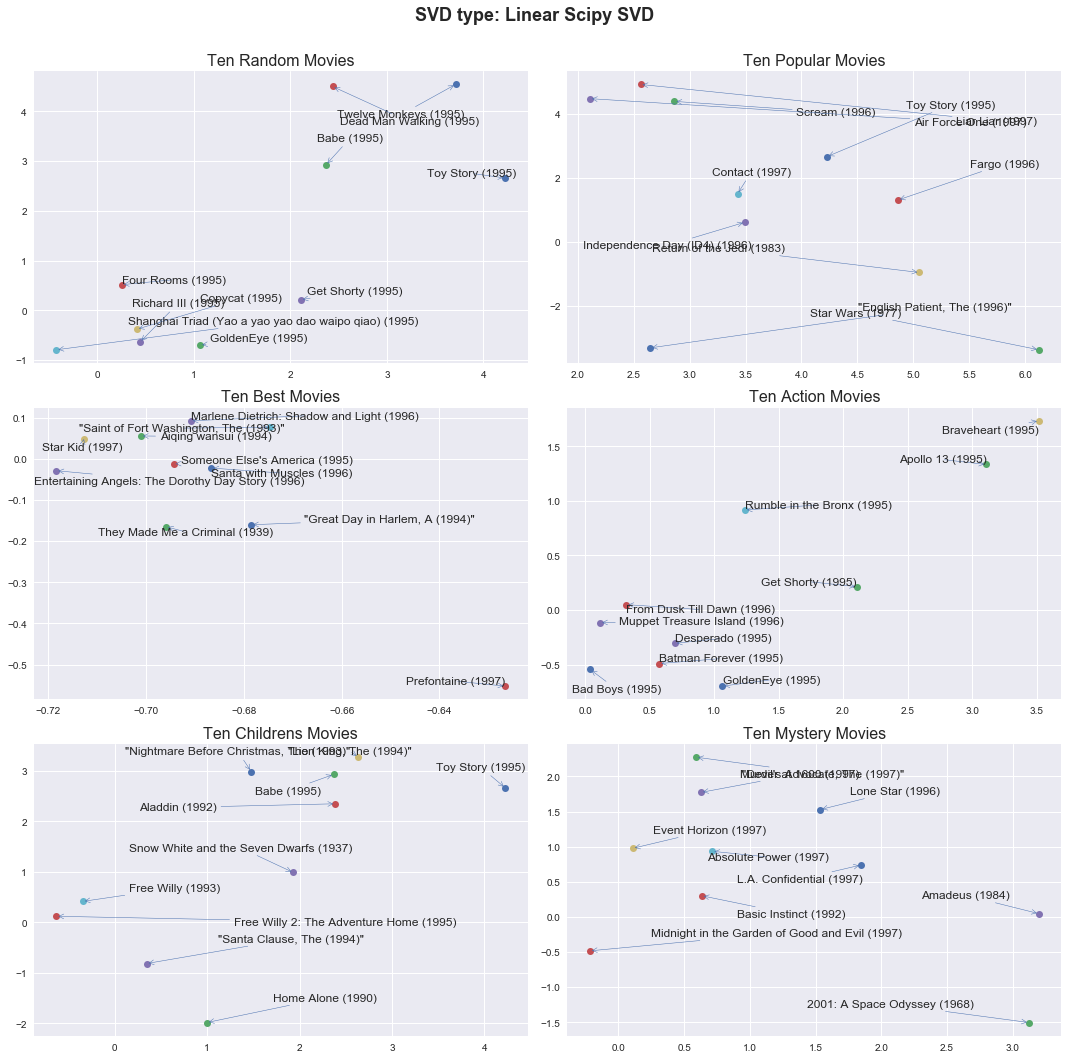

In [67]:
produce_visualizations(V_svds , 'Linear Scipy SVD')

This is using Surprise SVD


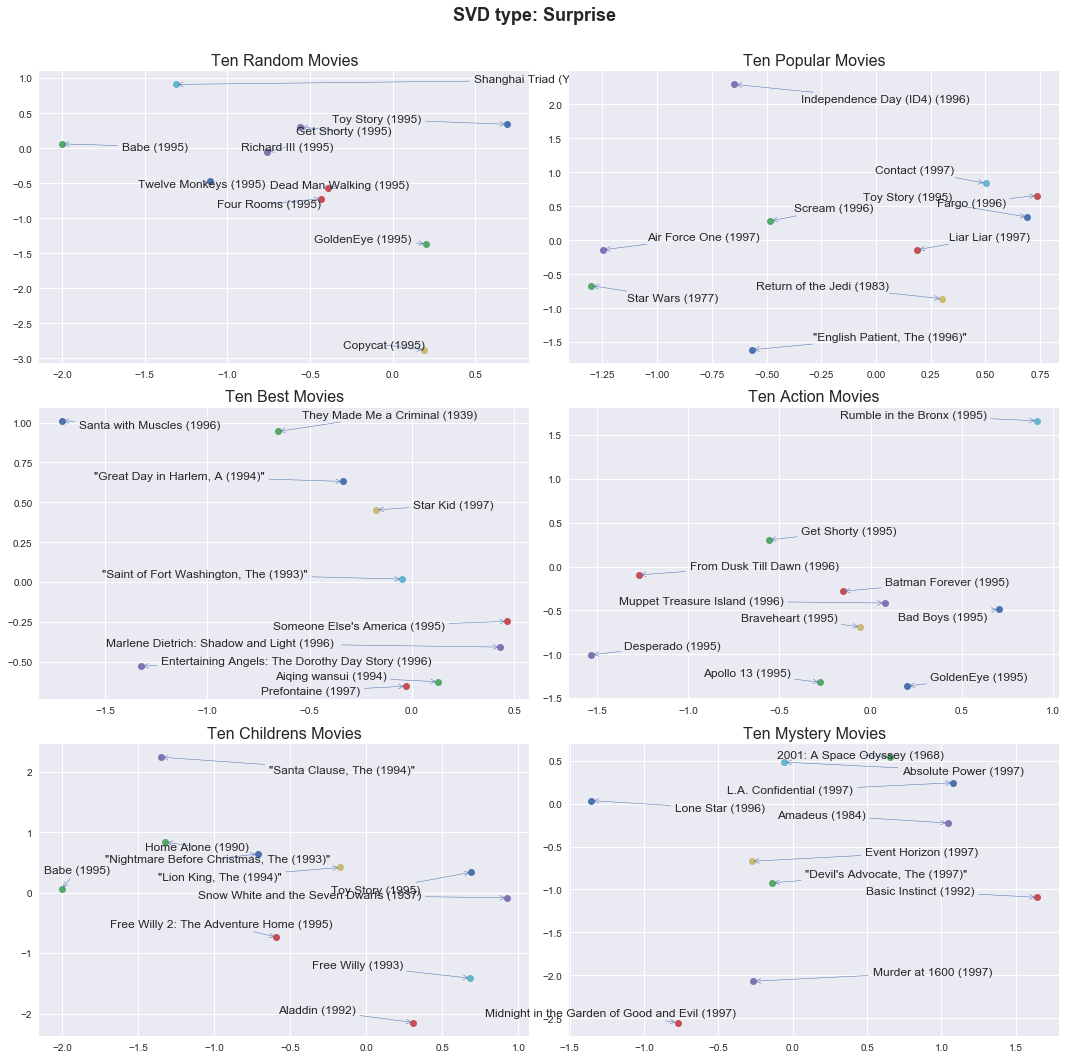

In [68]:
produce_visualizations(V_surprise , 'Surprise')

In [85]:
movies_list = [random_movies, popular_movies, best_movies, action_movies, \
               childrens_movies, mystery_movies]

df_movie = movies_list[0]
print(df_movie)


   Movie ID                                        Movie Title
0         1                                   Toy Story (1995)
1         2                                   GoldenEye (1995)
2         3                                  Four Rooms (1995)
3         4                                  Get Shorty (1995)
4         5                                     Copycat (1995)
5         6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6         7                              Twelve Monkeys (1995)
7         8                                        Babe (1995)
8         9                            Dead Man Walking (1995)
9        10                                 Richard III (1995)


[(1, '1995'),
 (2, '1995'),
 (3, '1995'),
 (4, '1995'),
 (5, '1995'),
 (6, '1995'),
 (7, '1995'),
 (8, '1995'),
 (9, '1995'),
 (10, '1995')]

In [129]:
def get_movie_year_id(df_movie):
    lst = []
    
    for i in range(len(df_movie)):
        last_char = df_movie['Movie Title'][i][-1]
    
        if last_char == '"':
            lst.append((df_movie['Movie ID'][i], int(df_movie['Movie Title'][i][-6:-2])))

        else:
            if(df_movie['Movie Title'][i]) != 'unknown':
                lst.append((df_movie['Movie ID'][i], int(df_movie['Movie Title'][i][-5:-1])))
    return lst, len(lst)

In [130]:
get_movie_year_id(movies_df)

ValueError: invalid literal for int() with base 10: '995)'

In [120]:
movies_df.loc[265]

Movie ID                             266
Movie Title    Kull the Conqueror (1997)
Unknown                                0
Action                                 1
Adventure                              1
Animation                              0
Childrens                              0
Comedy                                 0
Crime                                  0
Documentary                            0
Drama                                  0
Fantasy                                0
Film-Noir                              0
Horror                                 0
Musical                                0
Mystery                                0
Romance                                0
Sci-Fi                                 0
Thriller                               0
War                                    0
Western                                0
Name: 265, dtype: object

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [138]:
genres = ["Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", \
          "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", \
          "Sci-Fi", "Thriller", "War", "Western"]

def info_for_genre(genre):
    movie_ids = list(movies_df[movies_df[genre] == 1]["Movie ID"])
    return data_df[np.isin(data_df["Movie ID"], movie_ids)]

def generate_movies_list(genres):
    return [info_for_genre(genre) for genre in genres]





In [186]:
genres = ["Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", \
      "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", \
      "Sci-Fi", "Thriller", "War", "Western"]

V = V_normal
if V.shape !=(20, 1682):
    V = V.transpose()
a, s, b = np.linalg.svd(V)
V_tilde = np.dot(a[:2], V)

V_tilde[0] = (V_tilde[0] - np.mean(V_tilde[0])) / np.std(V_tilde[0])
V_tilde[1] = (V_tilde[1] - np.mean(V_tilde[1])) / np.std(V_tilde[1])

genre = "Action"

print(np.dot(V_tilde, movies_df[genre]) / (np.count_nonzero(movies_df[genre])))

[-0.14248393  0.26067302]


In [182]:
def genre_viz(V, type_of_svd):
    if V.shape !=(20, 1682):
        V = V.transpose()
    a, s, b = np.linalg.svd(V)
    V_tilde = np.dot(a[:2], V)
    assert V_tilde.shape ==(2, 1682)
    
    V_tilde[0] = (V_tilde[0] - np.mean(V_tilde[0])) / np.std(V_tilde[0])
    V_tilde[1] = (V_tilde[1] - np.mean(V_tilde[1])) / np.std(V_tilde[1])
    genres = ["Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", \
          "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", \
          "Sci-Fi", "Thriller", "War", "Western"]
    
    avg_points = []
    fig = plt.figure(facecolor="w",figsize=(15,15))
    j=0
    for genre in genres:
        ax=fig.add_subplot(10,2,j+1)
        total_gen = 
        avg_points.append(np.dot(V_tilde, movies_df[genre]) / (np.count_nonzero(movies_df[genre])))
        j+=1
        
        
    points_with_labels = [(avg_points[i][0], avg_points[i][1], genres[i]) for i in range(len(avg_points))]
    adjust_text(avg_points, ax=ax, autoalign='xy',  force_text=0.05, \
                    arrowprops=dict(arrowstyle="->", color='b', lw=0.5))
    
        
    fig.suptitle('SVD type: {}'.format(type_of_svd), size=18, fontweight='bold')
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)

AttributeError: 'list' object has no attribute 'get_position'

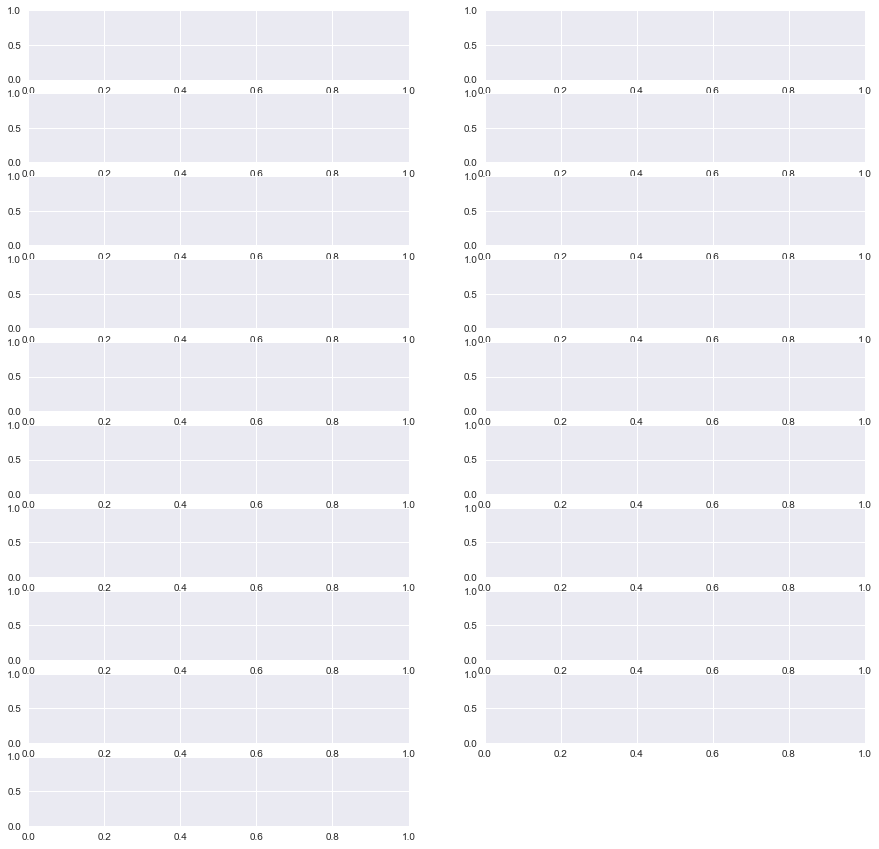

In [183]:
vals = np.transpose(genre_viz(V_global_bias , 'Surprise'))

In [169]:
def normalize(arr):
    return (arr - np.mean(arr))/(np.std(arr))

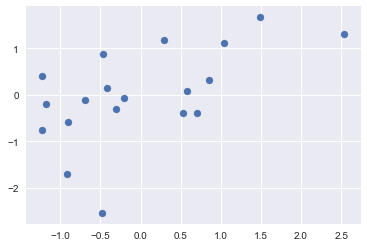

In [170]:
plt.scatter(normalize(vals[0]), normalize(vals[1]))

This is using Surprise SVD
[[0.31394437190746516, -0.6889960647156652], [0.01456155938279247, -0.05370915344435645], [-0.09197513309582558, 0.060090718273454156], [0.11948241064731817, -0.10872285831381301], [0.018835142657915784, 0.05427415839438281], [-0.004670911512238446, -0.03983136106401283], [0.1135956526473744, -0.01051513343659741], [0.04395276063857285, -0.06843071235640277], [-0.028241746416672913, 0.029644212260853352], [-0.140463544241819, -0.14640204286205732], [-0.2569332715404542, 0.33012212522791284], [0.014684756876589032, 0.03603716833582751], [0.011366300514274888, -0.02717347101156243], [0.018148568028510417, -0.10464550220215299], [0.03507192900651111, -0.006870850186515711], [-0.09826872430372258, -0.08243256679106967], [0.06580525541647764, -0.12018363169731218], [-0.19767390651096495, 0.02073879493285787], [0.04955417385975053, 0.004029860138252371]]


TypeError: object of type 'NoneType' has no len()